<h2>Predicting Subscriptions from Bank Customer Data<h2>

In this project we'll build and train a classifier that can predict whether a bank customer will subscribe to a term deposit or not. 

We'll use the [Bank Marketing Dataset](https://archive.ics.uci.edu/dataset/222/bank+marketing) from UC Irvine's Machine Learning Repository. It contains data on customers of a Portuguese banking institution that ran marketing campaigns to assess whether customers would subscribe to their product. 

In [197]:
#Import libraries 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

<h3>Exploratory Data Analysis: Numerical Data<h3>

We will start with exploring our dataset. As per the source, each customer had the following data collected about them. Additionally there are also some quarterly & monthly indicators:

1. <span style="background-color: #d3d3d3">age:</span> (numeric)
2. <span style="background-color: #d3d3d3">job:</span> type of job (categorical: 'admin','blue collar','entrepreneur','housemaid','management','retired','self employed','services','student','technician','unemployed','unknown')
3. <span style="background-color: #d3d3d3">marital:</span> marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. <span style="background-color: #d3d3d3">education:</span> (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. <span style="background-color: #d3d3d3">default:</span> has credit in default? (categorical: 'no','yes','unknown')
6. <span style="background-color: #d3d3d3">housing:</span> has housing loan? (categorical: 'no','yes','unknown')
7. <span style="background-color: #d3d3d3">loan:</span> has personal loan? (categorical: 'no','yes','unknown')
8. <span style="background-color: #d3d3d3">contact:</span> contact communication type (categorical: 'cellular','telephone')
9. <span style="background-color: #d3d3d3">month:</span> last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. <span style="background-color: #d3d3d3">day_of_week:</span> last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. <span style="background-color: #d3d3d3">duration:</span> last contact duration, in seconds (numeric).
12. <span style="background-color: #d3d3d3">campaign:</span> number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. <span style="background-color: #d3d3d3">pdays:</span> number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. <span style="background-color: #d3d3d3">previous:</span> number of contacts performed before this campaign and for this client (numeric)
15. <span style="background-color: #d3d3d3">poutcome:</span> outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
16. <span style="background-color: #d3d3d3">emp.var.rate:</span> employment variation rate - quarterly indicator (numeric)
17. <span style="background-color: #d3d3d3">cons.price.idx:</span> consumer price index - monthly indicator (numeric)
18. <span style="background-color: #d3d3d3">cons.conf.idx:</span> consumer confidence index - monthly indicator (numeric)
19. <span style="background-color: #d3d3d3">euribor3m:</span> euribor 3 month rate - daily indicator (numeric)
20. <span style="background-color: #d3d3d3">nr.employed:</span> number of employees - quarterly indicator (numeric)
21. <span style="background-color: #d3d3d3">y:</span> has the client subscribed a term deposit? (binary: 'yes','no')


In [220]:
#Load the dataset
bank_data = pd.read_csv("subscription_prediction.csv")
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,39,management,single,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


The dataset contains both numerical and categorical features. Let's look at the datatype for each column.

In [199]:
print(bank_data.dtypes)
bank_data.dtypes.value_counts()
print(f"Shape of the dataset: {bank_data.shape}")

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object
Shape of the dataset: (10122, 21)


Above we see we have `10122` observations, `20` features, and `1` target variable. `10` features are categorial and `10` are numerical.

Let's start by exploring the numerical variables:

In [200]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000
mean,40.313673,373.414049,2.369789,896.476882,0.297471,-0.432671,93.492407,-40.250573,3.035134,5138.838975
std,11.855014,353.277755,2.472392,302.175859,0.680535,1.714657,0.628615,5.271326,1.884191,85.859595
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,140.000000,1.000000,999.000000,0.000000,-1.800000,92.963000,-42.700000,1.252000,5076.200000
50%,38.000000,252.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.076000,5191.000000
75%,48.000000,498.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,98.000000,4199.000000,42.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


From the table above, we can observe that:

•The average age of consumers is `~40` years.<br>
•The median for `duration` is lower than its mean by roughly 121 s, indicating that it could be a right-skewed distribution with a possibility of outliers skewing the distribution. Note how max value is 3,826 s greater than the mean.<br>
•`cons.conf.idx` consists entirely of negative values: from a quick look at [Trading Economics Consumer Confidence](https://tradingeconomics.com/portugal/consumer-confidence) charts for Portugal these numbers look probable.<br>
•There don't seem to be any missing values in these columns. But we will have to confirm it across the entire dataset as well.

Before moving on to exploring the categorial data, let's quickly check if there are any missing values in the dataset or not.

In [201]:
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There are no missing values, so we can move ahead with the analysis.

<h3>Exploratory Data Analysis: Categorical Data<h3>

Let's group the categorial columns by `y` to see what their distribution is like.

In [221]:
categorical_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

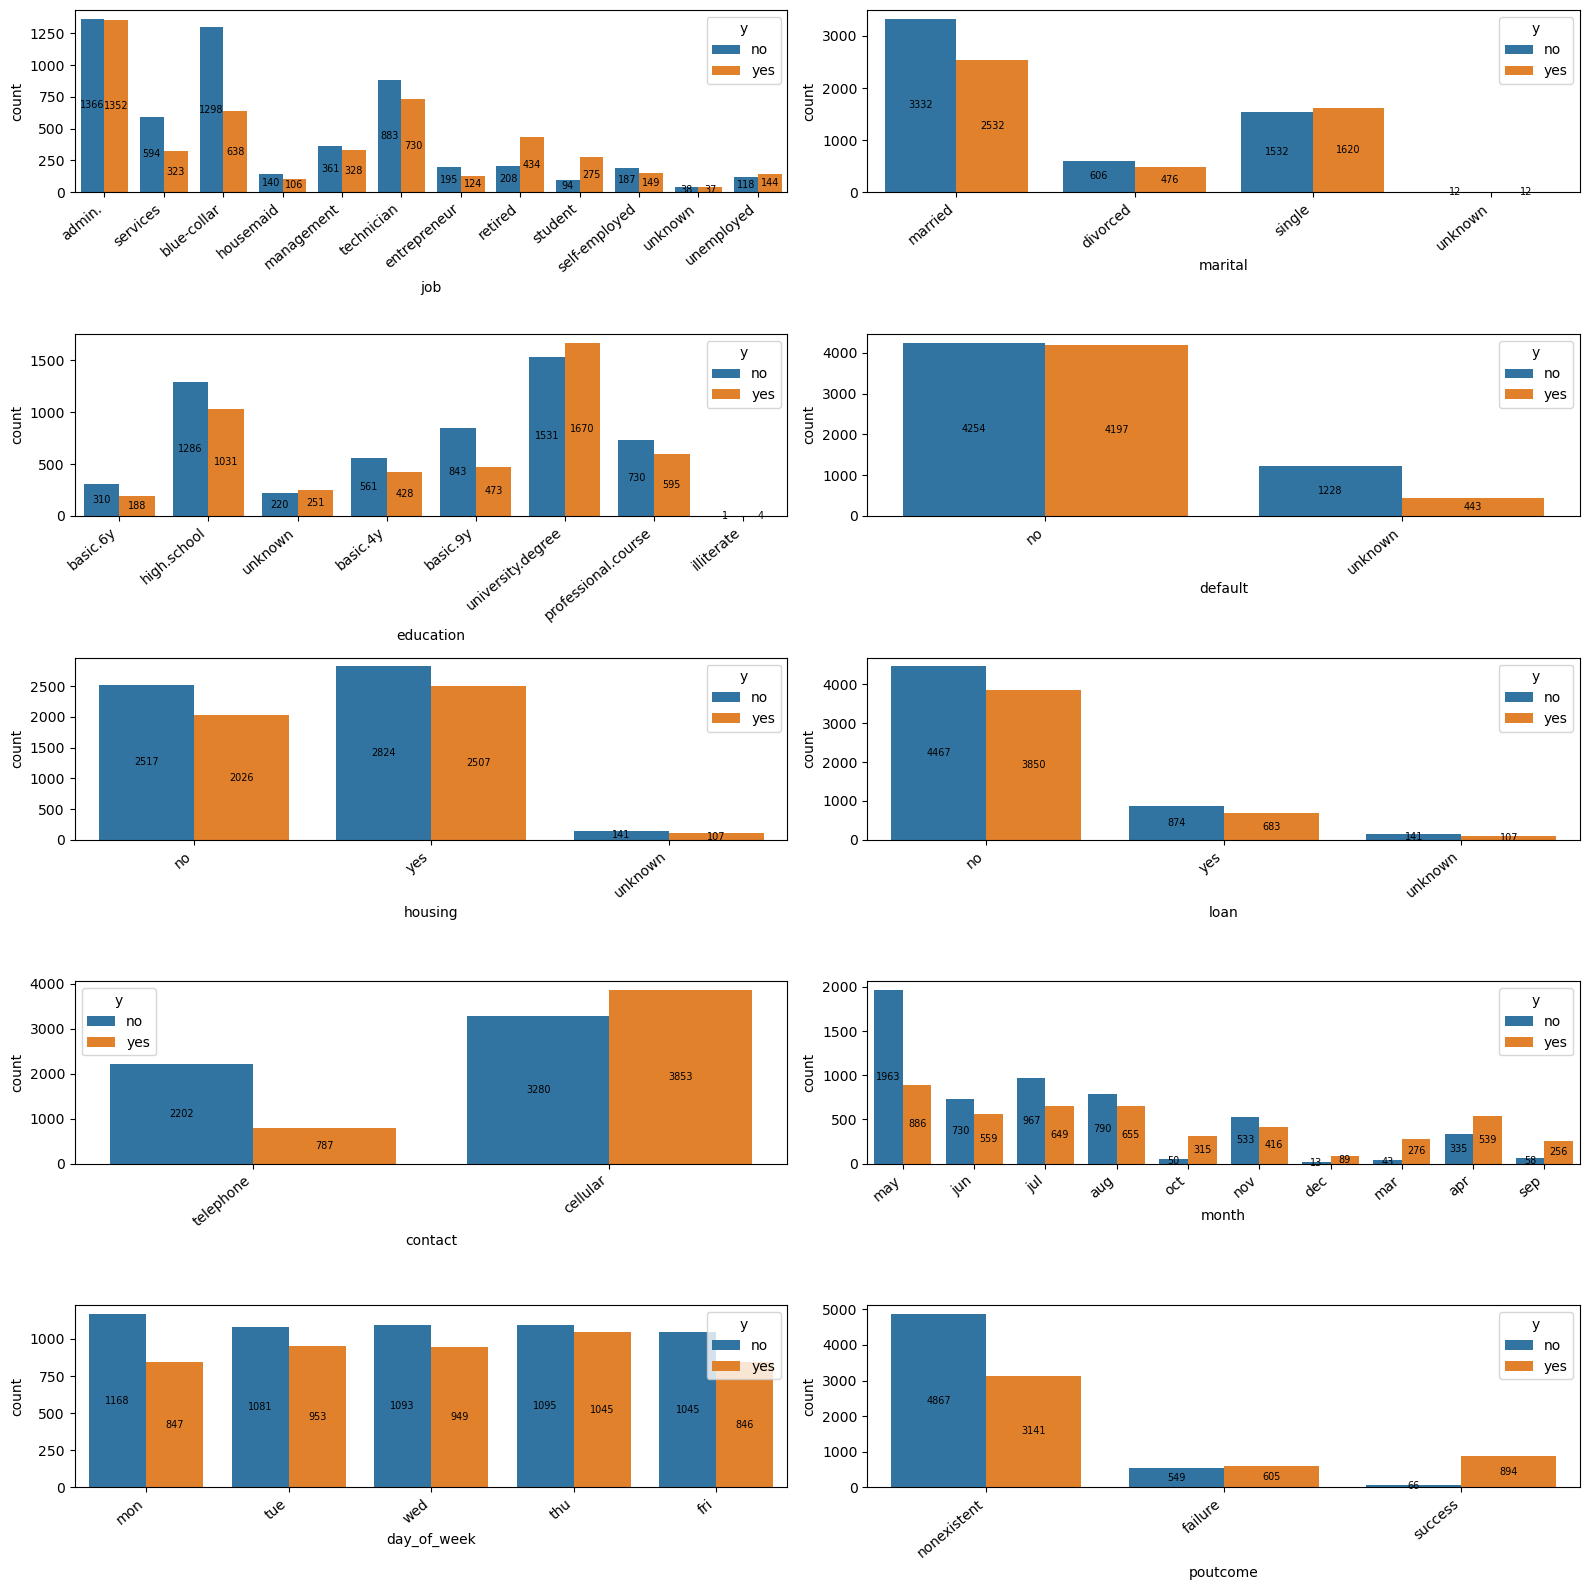

In [223]:
fig = plt.figure(figsize=(16,16))

for idx, col in enumerate(categorical_cols):
    ax = plt.subplot(5, 2, idx+1)
    # group by y
    sns.countplot(x=bank_data[col], hue=bank_data["y"], ax=ax)
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center",fontsize=7)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()

• Across categories, we often see that the consumer segment with the highest volume of positive results also had the highest volume of negative results e.g. `married` people were the biggest segment of consumers who converted in the `marital` category but also the biggest segment of people who didn't convert. Similarly, people with `admin` jobs were the biggest segment of consumers who converted in the `job` category but also the biggest segment of people who didn't convert. 

• We see from the p_outcome chart that if the last marketing campaign consumers were targeted with succeeded in converting them, they are highly likely to subscribe again. However, we don't only want to target people who already converted, and would always want to keep our customer pipeline growing.

Looking at the data distribution from the above plots there aren't immediate stand-out features, so it might be more effective to calculate the Pearson Correlation Coefficient for all the features & select the features with the highest r values.

<h3>Data Cleaning<h3>

Right now our target column `y` is in a categorial format, so we'll turn it into binary values: 1 for "yes" and 0 for "no."

In [204]:
bank_data["y"] = bank_data["y"].apply(lambda x: 1 if x=="yes" else 0)

For the remaining feature columns, for the ones that are categorical, we'll simply one-hot encode them by converting them into dummy variables. One hot encoding is a process by which categorical variables are converted into matrix form with 1 and 0 values, encoding them as numerical values for a more standardized comparison.

In [205]:
bank_data = pd.get_dummies(data = bank_data, drop_first = True)

<h3>Feature Selection<h3>

Let's identify how strongly the feature columns are correlated to the target colummn to help us narrow down on the features. We'll calculate the Pearson Correlation Coefficient on our columns to identify which features are strongly correlated to the target variable y. We'll select five features based on the highest absolute values of Pearson's r:

In [206]:
correlations = abs(bank_data.corr())
features = correlations["y"].sort_values(ascending=False)[1:6].index
print(features)

Index(['nr.employed', 'duration', 'euribor3m', 'emp.var.rate', 'pdays'], dtype='object')


Based on the above we can narrow down to:
`nr.employed`,
`duration`,
`euribor3m`,
`emp.var.rate`, and
`pdays`.

<h3>Building a Classifier with One Feature<h3>

We will split our dataset into a training and a test set first.

In [207]:
#Assign features to X and target to y
X = bank_data.drop(["y"], axis=1)
y = bank_data["y"]

In [208]:
#Split the dataset into training, validation, & test sets 
X_train, X_val, y_train, y_val = train_test_split(X[features], y, test_size=0.20, random_state = 390)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state = 390)

In [210]:
for feature in features:
    model = KNeighborsClassifier(n_neighbors = 3)
    model.fit(X_train[[feature]], y_train)
    accuracy = model.score(X_val[[feature]], y_val)
    print(f"The k-NN classifier trained on {feature} and with k = 3 has an accuracy of {accuracy*100:.2f}%")

The k-NN classifier trained on nr.employed and with k = 3 has an accuracy of 68.59%
The k-NN classifier trained on duration and with k = 3 has an accuracy of 67.95%
The k-NN classifier trained on euribor3m and with k = 3 has an accuracy of 64.40%
The k-NN classifier trained on emp.var.rate and with k = 3 has an accuracy of 67.46%
The k-NN classifier trained on pdays and with k = 3 has an accuracy of 63.21%


Our best forming model, with an accuracy of ~68%, was trained on the `nr.employed` feature with duration being the second closest. We will train a model using all of these features next to see if we can get a better score.

<h3>Building a Classifier with Multiple Features<h3>

Before training on all of the above features, we need to normalize the data first. We will use scikit-learn's MinMaxScaler to scale the values between 0 and 1, and then train the model.

In [211]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_val_scaled = scaler.transform(X_val[features])

In [212]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train_scaled, y_train)
accuracy = model.score(X_val_scaled, y_val)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 85.58


The model's accuracy jumped to ~85%. Using all these features results in an improved model, but, let's see what parameters/hyperparameters might be optimal.

<h3>Hyperparameter Optimization<h3>

Let's prepare our data first.

In [213]:
X = bank_data.drop(["y"], axis=1)
y = bank_data["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 390)

features = ['nr.employed', 'duration', 'euribor3m', 'emp.var.rate', 'pdays']

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])

Next we'll use use grid search to explore the following range of values for a couple of hyperparameters:<br>
• For k (n_neighbors in scikit-learn) we will use values in the range of 1 to 20.<br>
• We will use two distance metrics - minkwoski and manhattan.<br>
minkwoski is the default metric for KNeighborsClassifier in sklearn, so we don't expect manhattan to do better. But, let's see what happens.

In [214]:
grid_params = {"n_neighbors": range(1, 20),
                "metric": ["minkowski", "manhattan"]
              }

model = KNeighborsClassifier()
model_grid = GridSearchCV(model, grid_params, scoring='accuracy')
model_grid.fit(X_train_scaled, y_train)

best_score = model_grid.best_score_
best_params = model_grid.best_params_

print(f"Best model accuracy: {best_score*100:.2f}")
print(f"Best model parameters: {best_params}")

Best model accuracy: 88.02
Best model parameters: {'metric': 'manhattan', 'n_neighbors': 13}


Our model had an accuracy of ~88% with 13 n_neighbors and manhattan as the distance metric. We will evaluate our model on our test set now.

<h3>Evaluating the Model on the Test Set<h3>

In [215]:
X_test_scaled = scaler.transform(X_test[features])
predictions = model_grid.best_estimator_.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f" Model Accuracy on test set: {accuracy*100:.2f}")

 Model Accuracy on test set: 86.04


Our model got an accuracy of ~86%. This means that our model is likely to correctly predict whether a consumer is likely to subscribe ~86% of the time.

<h3>Summary and Next Steps<h3>

Our final model was trained using the features of `nr.employed`, `duration`, `euribor3m`, `emp.var.rate`, and`pdays`, and had test set accuracy of 86%. 

There are a few things we could try next to get better results:<br>
•Try out different features.<br>
•Expand the grid search parameters to identify more optimal hyperparameters.<br>
•Explore other algorithms that might perform better than k-NN.<br>
•Try and collect more data.<br>